In [ ]:
# importing libraries required
import xml.etree.ElementTree as ETree
import pandas as pd
import numpy as np

In [ ]:
#Parsing xml data 
xmldata = "/content/Laptops_Train.xml"
prstree = ETree.parse(xmldata)
root = prstree.getroot()

In [ ]:
columns1=[]
all_items1=[]

In [ ]:
#Parsing xml data 
for i in root.iter():
  root1=ETree.Element('root')
  root1=i
  for sentence in root1.iter('sentence'):
    root2=ETree.Element('root1')
    root2=(sentence)
    review_id = sentence.attrib.get('id')
    review = sentence.find('text').text
    for aspectTerms in root2.iter('aspectTerms'):
      root3=ETree.Element('root2')
      root3=(sentence)
      for aspectTerm in root3.iter('aspectTerm'):
        aspect=aspectTerm.attrib.get('term')
        polarity=aspectTerm.attrib.get('polarity')
        columns1=[review_id,review,aspect,polarity]
        all_items1.append(columns1)

In [ ]:
#loading into dataframes
df1 = pd.DataFrame(all_items1, columns=['id','review','aspect','polarity']) 

In [ ]:
#Data Cleaning and preprocessing
df_polarity=df1[['id','aspect','polarity']]

In [ ]:
df=df1[['id','review','aspect']]

In [ ]:
Final_df=df.drop_duplicates()

In [ ]:
Final_df['column_number'] = np.arange(len(Final_df))

2325

In [ ]:
pip install aspect_based_sentiment_analysis

     |████████████████████████████████| 454.3 MB 14 kB/s 
     |████████████████████████████████| 2.5 MB 39.6 MB/s 
     |████████████████████████████████| 308 kB 55.7 MB/s 
     |████████████████████████████████| 95 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 52.7 MB/s 
     |████████████████████████████████| 462 kB 32.7 MB/s 
     |████████████████████████████████| 4.0 MB 41.8 MB/s 
     |████████████████████████████████| 3.3 MB 35.5 MB/s 
     |████████████████████████████████| 895 kB 55.0 MB/s 
     |████████████████████████████████| 209 kB 52.4 MB/s 
     |████████████████████████████████| 80 kB 7.1 MB/s 
     |████████████████████████████████| 75 kB 3.9 MB/s 
     |████████████████████████████████| 112 kB 52.2 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 149 kB 53.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=9ca02c2f15d98a355e53ecc81f3dfea148b1e978060

In [ ]:
pip install transformers

In [ ]:
#importing the required libraries
import aspect_based_sentiment_analysis as absa

In [ ]:
#Building the model

from transformers import BertTokenizer,TFBertForSequenceClassification
name = 'absa/classifier-rest-0.2'
#name='absa/bert_abs_classifier-rest-0.1'
model = absa.BertABSClassifier.from_pretrained(name)
tokenizer = BertTokenizer.from_pretrained(name)
prof_name = 'absa/basic_reference_recognizer-rest-0.1'
recognizer = absa.aux_models.BasicReferenceRecognizer.from_pretrained(prof_name)
professor = absa.Professor(reference_recognizer=recognizer)
text_splitter = absa.sentencizer()
nlp = absa.Pipeline(model, tokenizer, professor, text_splitter)

#Defining function to extract the sentiment for each review
def sentiment_analysis(sentiment,aspect):
	task = nlp.preprocess(text = sentiment, aspects= [aspect])
	tokenized_examples = nlp.tokenize(task.examples)
	input_batch = nlp.encode(tokenized_examples)
	output_batch = nlp.predict(input_batch)
	predictions = nlp.review(tokenized_examples, output_batch)
	completed_task = nlp.postprocess(task, predictions)
	a = completed_task.examples
	print(sentiment)
	return a[0].sentiment

Downloading:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some layers from the model checkpoint at absa/classifier-rest-0.2 were not used when initializing BertABSClassifier: ['dropout_379']
- This IS expected if you are initializing BertABSClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertABSClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of BertABSClassifier were not initialized from the model checkpoint at absa/classifier-rest-0.2 and are newly initialized: ['dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

In [ ]:
#removing the junk data(Data cleaning)
data_c=[6,7,19,114,139,162,277,284,285,322,374,383,538,701,831,841,876,991,1121,1277,1391,1421,1490,1569,1606,1633,1670,1676,1841,2083,2108,2110,2118,2162,2163,2218,2219]
Final_df=Final_df[~Final_df['column_number'].isin(data_c)]

In [ ]:
#passing the dataframe as input to the model
Final_df['calculated_sentiment']=Final_df.apply(lambda x: sentiment_analysis(x.review, x.aspect), axis=1)

In [ ]:
#Extracting the original polarity for comparison
x=pd.merge(Final_df,df_polarity,how='inner',left_on=['id'],right_on=['id'])
#Labelling the Calculated_sentiment
x['calculated_sentiment'] = x['calculated_sentiment'].map({0:'neutral',1:'negative',2:'positive'})
x=x.drop_duplicates()

In [ ]:
x


,id,review,aspect_x,column_number,calculated_sentiment,aspect_y,polarity
0,2339,I charge it at night and skip taking the cord ...,cord,0,negative,cord,neutral
1,2339,I charge it at night and skip taking the cord ...,cord,0,negative,battery life,positive
4,2339,I charge it at night and skip taking the cord ...,battery life,1,positive,cord,neutral
5,2339,I charge it at night and skip taking the cord ...,battery life,1,positive,battery life,positive
8,1316,The tech guy then said the service center does...,service center,2,negative,service center,negative
...,...,...,...,...,...,...,...
9965,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2322,neutral,Windows Server Enterprise 2003,neutral
9966,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2322,neutral,Windows Server 2008 Enterprise,neutral
9972,848,"How Toshiba handles the repair seems to vary, ...",repair,2323,negative,repair,conflict
9973,848,"How Toshiba handles the repair seems to vary, ...",repair,2323,negative,repair,positive


In [ ]:
#Performance Evaluation using confusion Martrix
from sklearn.metrics import confusion_matrix,accuracy_score, plot_confusion_matrix
cm=confusion_matrix(x.polarity, x.calculated_sentiment,labels=['positive', 'negative','neutral'])

Text(0.5, 15.0, 'Predicted Values')

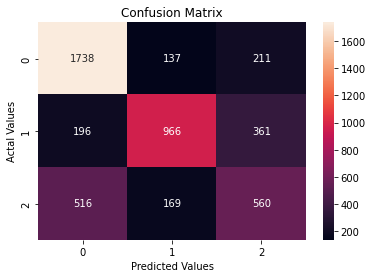

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True,fmt="1d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values') 

In [ ]:
accuracy_score(x.polarity, x.calculated_sentiment)

0.662741116751269

Breakdown of Model for a few samples

In [ ]:
Final_df

,id,review,aspect,column_number,calculated_sentiment
0,2339,I charge it at night and skip taking the cord ...,cord,0,1
1,2339,I charge it at night and skip taking the cord ...,battery life,1,2
2,1316,The tech guy then said the service center does...,service center,2,1
3,1316,The tech guy then said the service center does...,"""sales"" team",3,2
4,1316,The tech guy then said the service center does...,tech guy,4,1
...,...,...,...,...,...
2367,2272,We also use Paralles so we can run virtual mac...,Windows 7 Home Premium,2320,2
2368,2272,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,2321,0
2369,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2322,0
2370,848,"How Toshiba handles the repair seems to vary, ...",repair,2323,1


In [ ]:
#sample1
print(Final_df['review'].iloc[10])
print(Final_df['aspect'].iloc[10])

I even got my teenage son one, because of the features that it offers, like, iChat, Photobooth, garage band and more!
features


In [ ]:
#tokenization
task = nlp.preprocess(text = Final_df['review'].iloc[10],
                      aspects= [Final_df['aspect'].iloc[10]])
tokenized_examples = nlp.tokenize(task.examples)
input_batch = nlp.encode(tokenized_examples)

In [ ]:
#encoding
input_batch.token_ids

<tf.Tensor: shape=(1, 34), dtype=int32, numpy=
array([[  101,  1045,  2130,  2288,  2026,  9454,  2365,  2028,  1010,
         2138,  1997,  1996,  2838,  2008,  2009,  4107,  1010,  2066,
         1010, 22564,  4017,  1010,  6302, 27927,  2232,  1010,  7381,
         2316,  1998,  2062,   999,   102,  2838,   102]], dtype=int32)>

In [ ]:
tokenized_examples[0].tokens

['[CLS]',
 'i',
 'even',
 'got',
 'my',
 'teenage',
 'son',
 'one',
 ',',
 'because',
 'of',
 'the',
 'features',
 'that',
 'it',
 'offers',
 ',',
 'like',
 ',',
 'ichat',
 ',',
 'photobooth',
 ',',
 'garage',
 'band',
 'and',
 'more',
 '!',
 '[SEP]',
 'features',
 '[SEP]']

In [ ]:
#Model Prediction Behaviour for sample 1
recognizer = absa.aux_models.BasicPatternRecognizer()
nlp = absa.load(pattern_recognizer=recognizer)
completed_task = nlp(text = Final_df['review'].iloc[10] , aspects=[Final_df['aspect'].iloc[10]])
example = completed_task.examples
absa.summary(example[0])
absa.display(example[0].review)

Sentiment.positive for "features"
Scores (neutral/negative/positive): [0.001 0.001 0.999]


In [ ]:
#sample 2
print(Final_df['review'].iloc[30])
print(Final_df['aspect'].iloc[30])

The speed is incredible and I am more than satisfied.
speed


In [ ]:
#tokenization and encoding
task = nlp.preprocess(text = Final_df['review'].iloc[30],
                      aspects= [Final_df['aspect'].iloc[30]])
tokenized_examples = nlp.tokenize(task.examples)
input_batch = nlp.encode(tokenized_examples)
print("The tokens of the sample review are:")
print(tokenized_examples[0].tokens)
print("\nThe Encoded values of the tokens are:")
print(input_batch.token_ids)

The tokens of the sample review are:
['[CLS]', 'the', 'speed', 'is', 'incredible', 'and', 'i', 'am', 'more', 'than', 'satisfied', '.', '[SEP]', 'speed', '[SEP]']

The Encoded values of the tokens are:
tf.Tensor(
[[ 101 1996 3177 2003 9788 1998 1045 2572 2062 2084 8510 1012  102 3177
   102]], shape=(1, 15), dtype=int32)


In [ ]:
#extracting the sentiment for sample 2
task = nlp.preprocess(text = Final_df['review'].iloc[30], 
                      aspects= [Final_df['aspect'].iloc[30]])
tokenized_examples = nlp.tokenize(task.examples)
input_batch = nlp.encode(tokenized_examples)
output_batch = nlp.predict(input_batch)
predictions = nlp.review(tokenized_examples, output_batch)
completed_task = nlp.postprocess(task, predictions)
print("Sentiment Scores:", end=" ")
print(completed_task.examples[0].scores)
print("Sentiment:", end=" ")
completed_task.examples[0].sentiment

Sentiment Scores: [0.00029245325, 0.0011472447, 0.99856037]
Sentiment: 

<Sentiment.positive: 2>

In [ ]:
#Model Prediction Behaviour for sample 2
recognizer = absa.aux_models.BasicPatternRecognizer()
nlp = absa.load(pattern_recognizer=recognizer)
completed_task = nlp(text = Final_df['review'].iloc[30] ,
                     aspects=[Final_df['aspect'].iloc[30]])
example = completed_task.examples
absa.summary(example[0])
absa.display(example[0].review)

Sentiment.positive for "speed"
Scores (neutral/negative/positive): [0.    0.001 0.999]
